**Deutsch–Jozsa algorithm**

The Deutsch-Jozsa algorithm is one of the earliest examples of a quantum algorithm that demonstrates the advantage of using a quantum computer over classical computers. It solves the Deutsch-Jozsa problem, which is a problem of determining whether a given function is constant or balanced.

The problem statement is as follows: Given a black box function f that takes an n-bit input and produces a single-bit output, determine whether f is constant (outputs the same bit for all inputs) or balanced (outputs 0 for exactly half of the inputs and 1 for the other half).

The classical solution to the Deutsch-Jozsa problem requires 2^(n-1) + 1 function evaluations in the worst case. However, the quantum Deutsch-Jozsa algorithm can solve the problem with a single function evaluation, providing an exponential speedup.

Here is a high-level description of the Deutsch-Jozsa algorithm:

Initialize two n+1-qubit quantum registers in the state |0...0⟩|1⟩. The first n qubits represent the input qubits, and the last qubit is the output qubit.
Apply a Hadamard gate H to each qubit in the first register to create a superposition of all possible input states: (H⊗...⊗H)|0...0⟩.
Apply a controlled-Uf gate, where Uf is the quantum oracle that implements the function f. This gate flips the phase of the output qubit if and only if the corresponding input state produces a 1 under f.
Apply Hadamard gates to the first n qubits.
Measure the first n qubits.
The measurement result will be either all zeros (indicating a constant function) or a non-zero value (indicating a balanced function).

In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [7]:
# Define the constant and balanced functions
def constant_function():
    qc = QuantumCircuit(2)
    qc.x(1)
    return qc

In [8]:
def balanced_function():
    qc = QuantumCircuit(2)
    qc.cx(0, 1)
    return qc

In [9]:
def deutsch_jozsa_algorithm(f):
    # Determine the number of qubits required based on the function size
    n = f.num_qubits - 1  # Subtract 1 for the output qubit

    # Create a quantum circuit with n+1 qubits and n classical bits
    circuit = QuantumCircuit(n+1, n)

    # Apply Hadamard gates to all qubits
    circuit.h(range(n+1))

    # Apply the oracle function
    circuit.append(f, range(n+1))

    # Apply Hadamard gates to the input qubits
    circuit.h(range(n))

    # Measure the input qubits
    circuit.measure(range(n), range(n))

    return circuit


In [10]:
# Create the constant and balanced circuits
constant_circuit = constant_function()
balanced_circuit = balanced_function()

In [11]:
# Run the Deutsch-Jozsa algorithm for the constant function
circuit_constant = deutsch_jozsa_algorithm(constant_circuit)

In [12]:

# Run the Deutsch-Jozsa algorithm for the balanced function
circuit_balanced = deutsch_jozsa_algorithm(balanced_circuit)

In [13]:
# Draw the circuit diagrams
print("Constant Function Circuit:")
print(circuit_constant.draw())
print("Balanced Function Circuit:")
print(circuit_balanced.draw())


Constant Function Circuit:
     ┌───┐┌──────────────┐┌───┐┌─┐
q_0: ┤ H ├┤0             ├┤ H ├┤M├
     ├───┤│  circuit-166 │└───┘└╥┘
q_1: ┤ H ├┤1             ├──────╫─
     └───┘└──────────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 
Balanced Function Circuit:
     ┌───┐┌──────────────┐┌───┐┌─┐
q_0: ┤ H ├┤0             ├┤ H ├┤M├
     ├───┤│  circuit-167 │└───┘└╥┘
q_1: ┤ H ├┤1             ├──────╫─
     └───┘└──────────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 


In [14]:
# Transpile the circuits
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit_constant = transpile(circuit_constant, simulator)
transpiled_circuit_balanced = transpile(circuit_balanced, simulator)

In [15]:
# Simulate the circuits
job_constant = simulator.run(transpiled_circuit_constant, shots=1024)
job_balanced = simulator.run(transpiled_circuit_balanced, shots=1024)
result_constant = job_constant.result().get_counts()
result_balanced = job_balanced.result().get_counts()

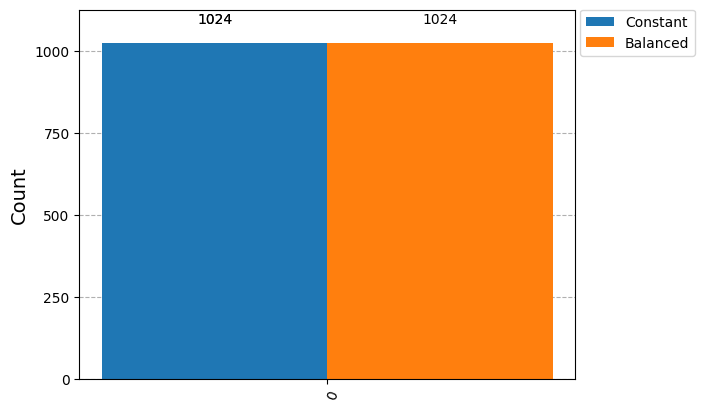

In [16]:
# Plot the histogram of the results
plot_histogram([result_constant, result_balanced], legend=['Constant', 'Balanced'])

**Simon's algorithm**

Simon's algorithm is a quantum algorithm designed to solve the Simon's problem. The problem involves finding a hidden periodicity or structure in a function. Specifically, given a black box function `f` that takes `n`-bit strings as input and produces `n`-bit strings as output, Simon's algorithm aims to determine the period `s` of the function `f`, where `s` is a bit string such that `f(x) = f(x ⊕ s)` for all `n`-bit strings `x`, and `⊕` denotes bitwise XOR.

The algorithm has applications in cryptography and is particularly useful for breaking classical symmetric-key cryptographic systems that are vulnerable to the related-key attacks. Simon's algorithm provides a speedup over classical algorithms for solving the problem, demonstrating the power of quantum computing in certain scenarios.

The algorithm proceeds as follows:

1. Initialize `2n` qubits in the state `|0...0⟩|0...0⟩`.
2. Apply Hadamard gates to the first `n` qubits to put them in a superposition: `H^n|0...0⟩`.
3. Query the black box function `f` by applying an oracle `Uf` that performs the transformation `|x⟩|y⟩ → |x⟩|y ⊕ f(x)⟩`.
4. Apply Hadamard gates to the first `n` qubits again.
5. Measure the first `n` qubits.

The measurement outcomes will be `n`-bit strings that are uniformly distributed among the `2^n` possible bit strings. By performing the measurement `2n-1` times and obtaining `2n-1` linearly independent measurement outcomes, it is possible to solve a system of linear equations to determine the hidden period `s` of the function `f`.

Simon's algorithm demonstrates the advantage of quantum computation in solving certain problems more efficiently than classical algorithms.

In [34]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

In [35]:
# Define Simon's algorithm
def simons_algorithm(f, n):
    # Create a quantum circuit with 2n qubits and n classical bits
    circuit = QuantumCircuit(2*n, n)

    # Apply Hadamard gates to the first n qubits
    circuit.h(range(n))

    # Apply the oracle circuit
    f(circuit, n)

    # Apply Hadamard gates to the first n qubits again
    circuit.h(range(n))

    # Measure the first n qubits
    circuit.measure(range(n), range(n))

    return circuit

In [36]:
# Define the oracle function for a given secret string s
def oracle_f(circuit, n, s):
    for i in range(n):
        if s[i] == '1':
            circuit.cx(i, n+i)

In [37]:
# Set the secret string
secret_string = '110'

In [38]:
# Define the number of qubits based on the length of the secret string
n_qubits = len(secret_string)

In [39]:
# Create the Simon's algorithm circuit
circuit = simons_algorithm(lambda circuit, n: oracle_f(circuit, n, secret_string), n_qubits)

In [40]:
# Choose the simulator backend
backend = Aer.get_backend('qasm_simulator')

In [41]:
# Transpile the circuit
transpiled_circuit = transpile(circuit, backend)

In [42]:
# Simulate the circuit
job = backend.run(transpiled_circuit, shots=1024)
result = job.result().get_counts(circuit)

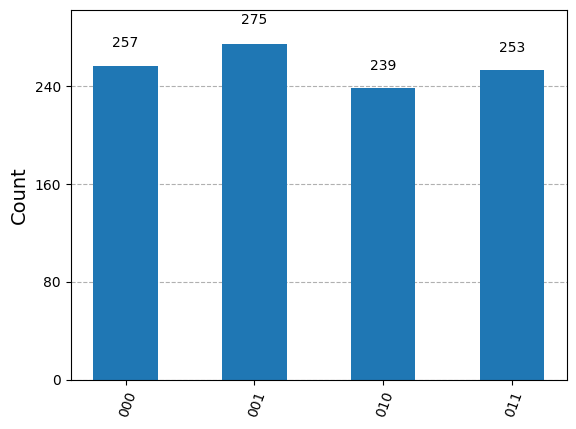

In [43]:
# Plot the histogram of the measurement results
plot_histogram(result)

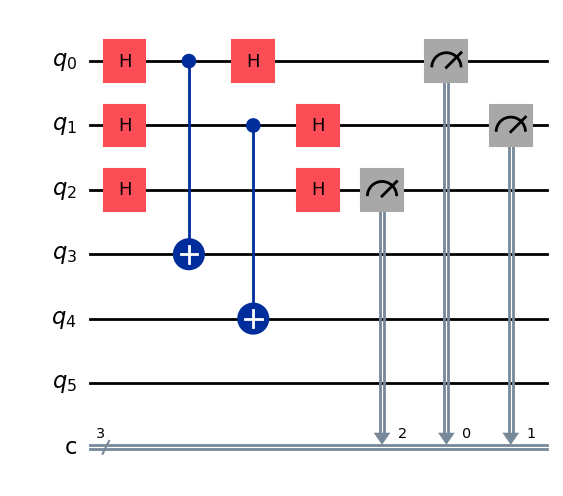

In [44]:

# Draw the circuit diagram
circuit.draw(output='mpl')